## 1. Download Data

In [1]:
import pandas as pd
from pandas.tseries.offsets import YearEnd

### 1.1) load deepsearch data

In [2]:
def load_deepsearch_data(filepath, column):
    df = pd.read_excel(filepath)
    if '날짜' in df.columns:
            df['날짜'] = pd.to_datetime(df['날짜'])
            df = df.set_index('날짜')
    elif 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df = df.set_index('Date')
    else :
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
    df.columns = [column]
    
    return df
    

In [3]:
filenames = [
    'krw_cad_xr',
    'current_account_korea', 'current_account_canada',
    'gdp_korea', 'gdp_canada',
    'gdp_growth_korea', 'gdp_growth_canada',
    'cpi_korea', 'cpi_canada',
    'int_rate_korea', 'int_rate_canada',
    'foreign_reserves',
    'gold_price',
    'WTI_monthly',
    'trade_exim'
]

In [4]:
dfs = []
for fname in filenames:
    print('Loading {}...'.format(fname))
    # 짱신기해...
    # filepath = './data/{}.xlxs'.format(fname)와 동일
    filepath = f'./proj_data/{fname}.xlsx'
    
    if fname in ['int_rate_canada'] :
        # deep search 이외의 데이터인 경우 
        df = pd.read_excel(filepath, skiprows=14)
        df.dropna(axis=1, inplace=True)
        df.sort_values(by='Date', ascending=True, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        df = df.loc['1998-12-31':]
        df.columns = ['int_rate_canada']
        
    elif fname in ['WTI_monthly'] :
        # deep search 이외의 데이터인 경우 
        df = pd.read_excel(filepath, skiprows = 2)
        df = df.set_index('Date')
        df.columns = ['oil_price']

                
    elif fname in ['trade_exim'] :
        # deep search 이외의 데이터인 경우 
        df = pd.read_excel(filepath, skiprows = 4)
        df = df.drop(0)
        df['PRIOD'] = pd.to_datetime(df['PRIOD'])
        df = df.set_index('PRIOD')
        df[['Export Value', 'Import Value']] = df[['Export Value', 'Import Value']].apply(lambda x: x.str.replace(',',''))
        df = df[['Export Value', 'Import Value']].astype(float)
        
    else :
        # deep search 데이터인경우          
        df = load_deepsearch_data(filepath, fname)

        if fname in ['gdp_growth_korea', 'gdp_growth_canada', 'current_account_canada']:
            df[fname] = df[fname].rolling(4).sum()
        elif fname in ['current_account_korea']:
            df[fname] = df[fname].rolling(12).sum()


    
    dfs.append(df)
    
print('Data loading is completed')

Loading krw_cad_xr...
Loading current_account_korea...
Loading current_account_canada...
Loading gdp_korea...
Loading gdp_canada...
Loading gdp_growth_korea...
Loading gdp_growth_canada...
Loading cpi_korea...
Loading cpi_canada...
Loading int_rate_korea...
Loading int_rate_canada...
Loading foreign_reserves...
Loading gold_price...
Loading WTI_monthly...
Loading trade_exim...
Data loading is completed


In [5]:
df_merged = pd.concat(dfs, axis = 1)

In [6]:
df_merged.columns

Index(['krw_cad_xr', 'current_account_korea', 'current_account_canada',
       'gdp_korea', 'gdp_canada', 'gdp_growth_korea', 'gdp_growth_canada',
       'cpi_korea', 'cpi_canada', 'int_rate_korea', 'int_rate_canada',
       'foreign_reserves', 'gold_price', 'oil_price', 'Export Value',
       'Import Value'],
      dtype='object')

In [7]:
df_merged.head()

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,int_rate_canada,foreign_reserves,gold_price,oil_price,Export Value,Import Value
1946-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.71,NaN,NaN,NaN
1946-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.71,NaN,NaN,NaN
1946-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.71,NaN,NaN,NaN
1946-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.71,NaN,NaN,NaN
1946-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.71,NaN,NaN,NaN


In [8]:
df_merged = df_merged.resample('M').last()

In [9]:
df_merged = df_merged.fillna(method='ffill')

In [10]:
df_merged['2010-01-01':].tail()

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,int_rate_canada,foreign_reserves,gold_price,oil_price,Export Value,Import Value
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,1.430,463118362.0,1829.20,71.71,573075.0,438224.0
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,1.770,461526656.0,1797.17,83.22,682608.0,576072.0
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,1.849,461766293.0,1908.99,91.64,591960.0,576430.0
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,2.401,461766293.0,1908.99,108.50,591960.0,576430.0
2022-04-30,968.06,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.852,2.401,461766293.0,1908.99,108.50,591960.0,576430.0


### 1.2) load other whole data

In [11]:
def load_world_bank_data(filepath, column, nation):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    df = df.set_index('Country Code')
    df = df.loc[nation].to_frame()
    
    df = df.iloc[3:]
    df.dropna(inplace=True)
    df[nation] = df[nation].astype(float)
    df['date'] = pd.to_datetime(df.index)+YearEnd(0)
    df.set_index('date', inplace=True)
    df.columns = [column]
    return df
      
    

### 1.3) load data for REAL XR

In [12]:
df_real_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real XR', 'KOR')

In [13]:
df_real_can_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real CAN XR', 'CAN')

In [14]:
df_ppp_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'PPP XR', 'KOR')

In [15]:
df_ppp_can_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'CAN PPP XR', 'CAN')

In [16]:
df_ppp_xr.tail()

,PPP XR
date,
2016-12-31,858.809687
2017-12-31,872.624771
2018-12-31,854.871397
2019-12-31,864.630567
2020-12-31,824.604924


### 1.4) dataset merge

In [17]:
df_ppp_merge = df_ppp_xr.join(df_ppp_can_xr)

In [18]:
df_ppp_merge.head()

,PPP XR,CAN PPP XR
date,,
1990-12-31,559.920181,1.241556
1991-12-31,591.112647,1.237590
1992-12-31,622.893976,1.227694
1993-12-31,646.528116,1.214689
1994-12-31,684.657732,1.206599


In [19]:
# real xr dataset merge
df_real_xr_merged = df_real_xr.join(df_real_can_xr)

In [20]:
df_real_xr_merged.head()

,Real XR,Real CAN XR
date,,
1990-12-31,0.791116,1.064069
1991-12-31,0.806044,1.080204
1992-12-31,0.797917,1.015714
1993-12-31,0.805472,0.941546
1994-12-31,0.852147,0.883567


In [21]:
df_merged = df_merged.join(df_ppp_merge)
df_merged = df_merged.join(df_real_xr_merged)

In [22]:
df_merged['2010-12-31':]
# df_ppp_merge df_real_xr_merged 연말인 12월31일데이터만 존재

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,int_rate_canada,foreign_reserves,gold_price,oil_price,Export Value,Import Value,PPP XR,CAN PPP XR,Real XR,Real CAN XR
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,3.117,291570661.0,1421.40,89.15,334170.0,402901.0,840.991702,1.22182,0.727463,1.186103
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,3.274,295956219.0,1332.68,89.17,351479.0,399885.0,NaN,NaN,NaN,NaN
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,3.302,297667285.0,1411.33,88.58,301086.0,457085.0,NaN,NaN,NaN,NaN
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,3.353,298617571.0,1432.20,102.86,434091.0,455920.0,NaN,NaN,NaN,NaN
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,3.213,307198549.0,1563.70,109.53,420488.0,571971.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,1.430,463118362.0,1829.20,71.71,573075.0,438224.0,NaN,NaN,NaN,NaN
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,1.770,461526656.0,1797.17,83.22,682608.0,576072.0,NaN,NaN,NaN,NaN
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,1.849,461766293.0,1908.99,91.64,591960.0,576430.0,NaN,NaN,NaN,NaN
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,2.401,461766293.0,1908.99,108.50,591960.0,576430.0,NaN,NaN,NaN,NaN


### 2-1) Data Preprocessing- currency returns

In [23]:
df_merged['ann_ret'] = \
    df_merged['krw_cad_xr'].pct_change(periods=12)*100

In [24]:
df_merged['F12.ann_ret'] = \
    df_merged['ann_ret'].shift(-12)

In [25]:
df_merged['2010-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,gold_price,oil_price,Export Value,Import Value,PPP XR,CAN PPP XR,Real XR,Real CAN XR,ann_ret,F12.ann_ret
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,...,1421.40,89.15,334170.0,402901.0,840.991702,1.22182,0.727463,1.186103,2.861814,-0.784248
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,...,1332.68,89.17,351479.0,399885.0,NaN,NaN,NaN,NaN,2.638982,0.920251
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,...,1411.33,88.58,301086.0,457085.0,NaN,NaN,NaN,NaN,5.635195,-1.896047
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,...,1432.20,102.86,434091.0,455920.0,NaN,NaN,NaN,NaN,2.704554,0.160580
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,...,1563.70,109.53,420488.0,571971.0,NaN,NaN,NaN,NaN,1.533367,2.478907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,1829.20,71.71,573075.0,438224.0,NaN,NaN,NaN,NaN,9.060120,NaN
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,1797.17,83.22,682608.0,576072.0,NaN,NaN,NaN,NaN,8.644618,NaN
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,1908.99,91.64,591960.0,576430.0,NaN,NaN,NaN,NaN,7.253267,NaN
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,1908.99,108.50,591960.0,576430.0,NaN,NaN,NaN,NaN,8.068217,NaN


### 2-2) Data Preprocessing-ppp calculate

$$
    \text{ppp calculate} = \frac{\frac{{P(KRW)}}{P(USD)}} {\frac{{P(CAN)}}{P(USD)}} = \frac{{P(KRW)}}{P(CAN)}
$$

In [26]:
# world bank의 PPP 기준으로 KRW/CAN의 PPP 계산 >> CALC_PPP_XR
df_merged['CALC_PPP_XR'] = df_merged['PPP XR']/ df_merged['CAN PPP XR']

### 2-3) Data Preprocessing-CALC_REAL_XR

In [27]:
# world bank의 real XR 기준으로 KRW/CAN의 real XR 계산 >> CALC_REAL_XR
# 추후 계산한 real XR에 검증용
df_merged['CALC_REAL_XR'] = df_merged['Real XR']/df_merged['Real CAN XR']

In [28]:
df_merged.loc[['2009-12-31']]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,Export Value,Import Value,PPP XR,CAN PPP XR,Real XR,Real CAN XR,ann_ret,F12.ann_ret,CALC_PPP_XR,CALC_REAL_XR
2009-12-31,1106.99,33087.6,-40775.27,943941.9,1376509.2,5.1,-1.8,98.04,98.57,3.48,...,304392.0,287728.0,828.420848,1.202244,0.64876,1.05174,6.614595,2.861814,689.06216,0.616844


In [29]:
df_merged['CALC_PPP_XR'] = df_merged['CALC_PPP_XR'].fillna(method='ffill')
df_merged['CALC_REAL_XR'] = df_merged['CALC_REAL_XR'].fillna(method='ffill')

In [30]:
df_merged['2010-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,Export Value,Import Value,PPP XR,CAN PPP XR,Real XR,Real CAN XR,ann_ret,F12.ann_ret,CALC_PPP_XR,CALC_REAL_XR
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,...,334170.0,402901.0,840.991702,1.22182,0.727463,1.186103,2.861814,-0.784248,688.310637,0.613322
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,...,351479.0,399885.0,NaN,NaN,NaN,NaN,2.638982,0.920251,688.310637,0.613322
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,...,301086.0,457085.0,NaN,NaN,NaN,NaN,5.635195,-1.896047,688.310637,0.613322
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,...,434091.0,455920.0,NaN,NaN,NaN,NaN,2.704554,0.160580,688.310637,0.613322
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,...,420488.0,571971.0,NaN,NaN,NaN,NaN,1.533367,2.478907,688.310637,0.613322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,573075.0,438224.0,NaN,NaN,NaN,NaN,9.060120,NaN,661.949395,0.752182
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,682608.0,576072.0,NaN,NaN,NaN,NaN,8.644618,NaN,661.949395,0.752182
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,591960.0,576430.0,NaN,NaN,NaN,NaN,7.253267,NaN,661.949395,0.752182
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,591960.0,576430.0,NaN,NaN,NaN,NaN,8.068217,NaN,661.949395,0.752182


### 2-4) Data Preprocessing- New Real Xr

$$
    \text{Real XR} = \frac{S^{PPP}}{S}
$$

In [31]:
## New Real XR calculate
df_merged['New Real XR'] = \
    df_merged['CALC_PPP_XR']/df_merged['krw_cad_xr']


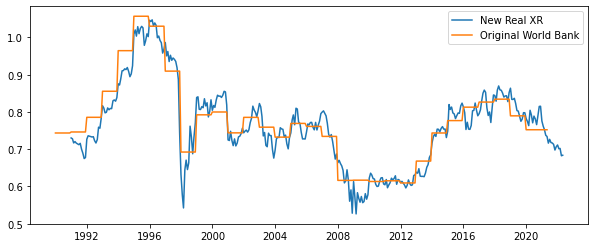

In [32]:
# let's draw a gragh with New Real XR and Original World Bank data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)

plt.plot(df_merged['New Real XR'], label = 'New Real XR')
plt.plot(df_merged['CALC_REAL_XR'].shift(-12), label = 'Original World Bank')
plt.legend()
plt.show()

In [33]:
df_merged['2010-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,Import Value,PPP XR,CAN PPP XR,Real XR,Real CAN XR,ann_ret,F12.ann_ret,CALC_PPP_XR,CALC_REAL_XR,New Real XR
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,...,402901.0,840.991702,1.22182,0.727463,1.186103,2.861814,-0.784248,688.310637,0.613322,0.604486
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,...,399885.0,NaN,NaN,NaN,NaN,2.638982,0.920251,688.310637,0.613322,0.618573
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,...,457085.0,NaN,NaN,NaN,NaN,5.635195,-1.896047,688.310637,0.613322,0.596467
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,...,455920.0,NaN,NaN,NaN,NaN,2.704554,0.160580,688.310637,0.613322,0.603983
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,...,571971.0,NaN,NaN,NaN,NaN,1.533367,2.478907,688.310637,0.613322,0.610031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,438224.0,NaN,NaN,NaN,NaN,9.060120,NaN,661.949395,0.752182,0.711307
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,576072.0,NaN,NaN,NaN,NaN,8.644618,NaN,661.949395,0.752182,0.701143
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,576430.0,NaN,NaN,NaN,NaN,7.253267,NaN,661.949395,0.752182,0.701991
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,576430.0,NaN,NaN,NaN,NaN,8.068217,NaN,661.949395,0.752182,0.682317


### 2-5) Data Preprocessing- current account relative to GDP

In [34]:
df_merged['ca_gdp_korea'] = df_merged['current_account_korea']/df_merged['gdp_korea']*100

In [35]:
df_merged['ca_gdp_canada'] = df_merged['current_account_canada']/df_merged['gdp_canada']*100

In [36]:
df_merged['2010-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,CAN PPP XR,Real XR,Real CAN XR,ann_ret,F12.ann_ret,CALC_PPP_XR,CALC_REAL_XR,New Real XR,ca_gdp_korea,ca_gdp_canada
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,...,1.22182,0.727463,1.186103,2.861814,-0.784248,688.310637,0.613322,0.604486,2.443082,-3.596181
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,...,NaN,NaN,NaN,2.638982,0.920251,688.310637,0.613322,0.618573,2.322180,-3.596181
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,...,NaN,NaN,NaN,5.635195,-1.896047,688.310637,0.613322,0.596467,2.467915,-3.596181
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,...,NaN,NaN,NaN,2.704554,0.160580,688.310637,0.613322,0.603983,2.174628,-3.539929
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,...,NaN,NaN,NaN,1.533367,2.478907,688.310637,0.613322,0.610031,1.882503,-3.539929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,NaN,NaN,NaN,9.060120,NaN,661.949395,0.752182,0.711307,5.518208,-0.063136
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,NaN,NaN,NaN,8.644618,NaN,661.949395,0.752182,0.701143,5.197730,-0.063136
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,NaN,NaN,NaN,7.253267,NaN,661.949395,0.752182,0.701991,5.197730,-0.063136
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,NaN,NaN,NaN,8.068217,NaN,661.949395,0.752182,0.682317,5.197730,-0.063136


In [37]:
df_merged.loc['2009-12-31':][['ca_gdp_korea', 'ca_gdp_canada']].head()

,ca_gdp_korea,ca_gdp_canada
2009-12-31,3.505258,-2.962223
2010-01-31,3.298445,-2.962223
2010-02-28,2.733219,-2.962223
2010-03-31,2.217414,-3.442037
2010-04-30,1.969274,-3.442037


### 2-6) Data Preprocessing- GDP Growth

In [38]:
df_merged['gdp_growth_korea2'] = df_merged['gdp_korea'].pct_change(periods=12)*100

In [39]:
df_merged['gdp_growth_canada2'] = df_merged['gdp_canada'].pct_change(periods=12)*100

In [40]:
df_merged['2010-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,Real CAN XR,ann_ret,F12.ann_ret,CALC_PPP_XR,CALC_REAL_XR,New Real XR,ca_gdp_korea,ca_gdp_canada,gdp_growth_korea2,gdp_growth_canada2
2010-12-31,1138.67,27950.5,-58162.67,1144067.0,1617345.3,6.3,3.5,101.02,100.89,2.890,...,1.186103,2.861814,-0.784248,688.310637,0.613322,0.604486,2.443082,-3.596181,21.200998,17.496149
2011-01-31,1112.74,26567.3,-58162.67,1144067.0,1617345.3,6.3,3.5,102.22,101.14,3.330,...,NaN,2.638982,0.920251,688.310637,0.613322,0.618573,2.322180,-3.596181,21.200998,17.496149
2011-02-28,1153.98,28234.6,-58162.67,1144067.0,1617345.3,5.2,3.5,102.92,101.40,3.400,...,NaN,5.635195,-1.896047,688.310637,0.613322,0.596467,2.467915,-3.596181,21.200998,17.496149
2011-03-31,1139.62,24879.2,-57252.88,1144067.0,1617345.3,5.2,3.1,103.32,102.52,3.420,...,NaN,2.704554,0.160580,688.310637,0.613322,0.603983,2.174628,-3.539929,21.200998,17.496149
2011-04-30,1128.32,21537.1,-57252.88,1144067.0,1617345.3,5.2,3.1,103.42,102.86,3.480,...,NaN,1.533367,2.478907,688.310637,0.613322,0.610031,1.882503,-3.539929,21.200998,17.496149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,NaN,9.060120,NaN,661.949395,0.752182,0.711307,5.518208,-0.063136,0.000000,0.000000
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,NaN,8.644618,NaN,661.949395,0.752182,0.701143,5.197730,-0.063136,0.000000,0.000000
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,NaN,7.253267,NaN,661.949395,0.752182,0.701991,5.197730,-0.063136,0.000000,0.000000
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,NaN,8.068217,NaN,661.949395,0.752182,0.682317,5.197730,-0.063136,0.000000,0.000000


In [41]:
df_merged.loc[['2018-12-31', '2019-12-31']][['gdp_canada', 'gdp_growth_korea2','gdp_growth_canada2']]

,gdp_canada,gdp_growth_korea2,gdp_growth_canada2
2018-12-31,1716179.4,5.953397,4.034536
2019-12-31,1736346.3,-4.556310,1.175104


### 2-7) Data Preprocessing- Inflation & Inflation Interest rate differential

In [42]:
df_merged['infl_korea'] = df_merged['cpi_korea'].pct_change(periods=12) *100

In [43]:
df_merged['infl_canada'] = df_merged['cpi_canada'].pct_change(periods=12) *100

In [44]:
df_merged['infl_diff'] = df_merged['infl_korea']- df_merged['infl_canada']

In [45]:
df_merged['int_rate_diff'] = df_merged['int_rate_korea']- df_merged['int_rate_canada']

In [46]:
df_merged['2008-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,CALC_REAL_XR,New Real XR,ca_gdp_korea,ca_gdp_canada,gdp_growth_korea2,gdp_growth_canada2,infl_korea,infl_canada,infl_diff,int_rate_diff
2008-12-31,1038.31,1753.0,3177.94,1047339.0,1552864.1,-1.6,0.1,95.37,97.28,3.260,...,0.616281,0.613038,0.167377,0.204650,-10.683404,5.71643,4.138458,1.164725,2.973733,0.572
2009-01-31,1116.50,2617.5,3177.94,1047339.0,1552864.1,-1.6,0.1,95.46,97.02,2.530,...,0.616281,0.570106,0.249919,0.204650,-10.683404,5.71643,3.749592,1.073028,2.676564,-0.534
2009-02-28,1209.49,9865.7,3177.94,1047339.0,1552864.1,-1.9,0.1,96.15,97.71,2.540,...,0.616281,0.526274,0.941978,0.204650,-10.683404,5.71643,4.103508,1.422047,2.681461,-0.592
2009-03-31,1091.38,14679.2,-6845.27,1047339.0,1552864.1,-1.9,-2.3,96.84,97.88,2.700,...,0.616281,0.583228,1.401571,-0.440816,-10.683404,5.71643,3.883287,1.241208,2.642079,-0.080
2009-04-30,1119.83,20204.9,-6845.27,1047339.0,1552864.1,-1.9,-2.3,97.09,97.80,2.530,...,0.616281,0.568411,1.929165,-0.440816,-10.683404,5.71643,3.573715,0.359159,3.214556,-0.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,0.752182,0.711307,5.518208,-0.063136,0.000000,0.00000,3.782526,4.806307,-1.023780,-0.080
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,0.752182,0.701143,5.197730,-0.063136,0.000000,0.00000,3.660310,5.140738,-1.480429,-0.307
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,0.752182,0.701991,5.197730,-0.063136,0.000000,0.00000,3.139891,5.685058,-2.545167,-0.346
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,0.752182,0.682317,5.197730,-0.063136,0.000000,0.00000,2.990908,5.156015,-2.165107,-0.586


### 2-8) Data Preprocessing- Foreign Reserves

In [47]:
df_merged['reserves_to_gdp'] = df_merged['foreign_reserves']/df_merged['gdp_korea']/1000*100
df_merged['reserves_growth'] = df_merged['foreign_reserves'].pct_change(periods=12)*100


In [48]:
df_merged['2008-12-31':]

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,ca_gdp_korea,ca_gdp_canada,gdp_growth_korea2,gdp_growth_canada2,infl_korea,infl_canada,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
2008-12-31,1038.31,1753.0,3177.94,1047339.0,1552864.1,-1.6,0.1,95.37,97.28,3.260,...,0.167377,0.204650,-10.683404,5.71643,4.138458,1.164725,2.973733,0.572,19.212825,-23.262798
2009-01-31,1116.50,2617.5,3177.94,1047339.0,1552864.1,-1.6,0.1,95.46,97.02,2.530,...,0.249919,0.204650,-10.683404,5.71643,3.749592,1.073028,2.676564,-0.534,19.262245,-22.961608
2009-02-28,1209.49,9865.7,3177.94,1047339.0,1552864.1,-1.9,0.1,96.15,97.71,2.540,...,0.941978,0.204650,-10.683404,5.71643,4.103508,1.422047,2.681461,-0.592,19.242540,-23.185343
2009-03-31,1091.38,14679.2,-6845.27,1047339.0,1552864.1,-1.9,-2.3,96.84,97.88,2.700,...,1.401571,-0.440816,-10.683404,5.71643,3.883287,1.241208,2.642079,-0.080,19.701403,-21.913389
2009-04-30,1119.83,20204.9,-6845.27,1047339.0,1552864.1,-1.9,-2.3,97.09,97.80,2.530,...,1.929165,-0.440816,-10.683404,5.71643,3.573715,0.359159,3.214556,-0.564,20.287416,-18.429075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,930.61,90382.5,-1038.86,1637895.8,1645423.4,3.7,3.9,120.45,123.64,1.350,...,5.518208,-0.063136,0.000000,0.00000,3.782526,4.806307,-1.023780,-0.080,28.275203,4.518241
2022-01-31,944.10,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,124.76,1.463,...,5.197730,-0.063136,0.000000,0.00000,3.660310,5.140738,-1.480429,-0.307,28.178023,4.246165
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,5.197730,-0.063136,0.000000,0.00000,3.139891,5.685058,-2.545167,-0.346,28.192654,3.174745
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,5.197730,-0.063136,0.000000,0.00000,2.990908,5.156015,-2.165107,-0.586,28.192654,3.505480


### 2-9) Data Preprocessing- Gold Price

In [49]:
df_merged['gold_growth'] = df_merged['gold_price']
# .pct_change(periods=12) * 100

### 2-11) Data Preprocessing- Oil

In [50]:
df_merged['oil_growth'] = df_merged['oil_price']
# .pct_change(periods=12) * 100

### 2-12) Data Preprocessing- Trade

In [51]:
# df_merged['ann_ret_exp'] = df_merged['Export Value'].pct_change(periods=12) * 100
# df_merged['F12.ann_ret_exp'] = df_merged['ann_ret_exp'].shift(-12)

df_merged['ann_ret_exp'] = df_merged['Export Value']/df_merged['gdp_korea']
df_merged['ann_ret_exp_growth'] = df_merged['ann_ret_exp'].pct_change(periods=12)*100

In [52]:
# df_merged['ann_ret_imp'] = df_merged['Import Value'].pct_change(periods=12) * 100
# df_merged['F12.ann_ret_imp'] = df_merged['ann_ret_imp'].shift(-12)
df_merged['ann_ret_imp'] = df_merged['Import Value']/df_merged['gdp_korea']
df_merged['ann_ret_imp_growth'] = df_merged['ann_ret_imp'].pct_change(periods=12)*100

## 3. Use OLS!!!

### 3-1). Use OLS - date_slicing

In [53]:
dataset = df_merged.loc['2008-12-31':].copy()

In [54]:
dataset.head()

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,gold_growth,oil_growth,ann_ret_exp,ann_ret_exp_growth,ann_ret_imp,ann_ret_imp_growth
2008-12-31,1038.31,1753.0,3177.94,1047339.0,1552864.1,-1.6,0.1,95.37,97.28,3.26,...,2.973733,0.572,19.212825,-23.262798,882.05,41.12,0.262907,16.360837,0.351915,40.267561
2009-01-31,1116.50,2617.5,3177.94,1047339.0,1552864.1,-1.6,0.1,95.46,97.02,2.53,...,2.676564,-0.534,19.262245,-22.961608,927.85,41.71,0.200183,-23.279321,0.242689,-17.370987
2009-02-28,1209.49,9865.7,3177.94,1047339.0,1552864.1,-1.9,0.1,96.15,97.71,2.54,...,2.681461,-0.592,19.242540,-23.185343,942.32,39.09,0.210700,-10.994198,0.221604,-17.418397
2009-03-31,1091.38,14679.2,-6845.27,1047339.0,1552864.1,-1.9,-2.3,96.84,97.88,2.70,...,2.642079,-0.080,19.701403,-21.913389,919.35,47.94,0.268272,-8.752376,0.299616,-6.420404
2009-04-30,1119.83,20204.9,-6845.27,1047339.0,1552864.1,-1.9,-2.3,97.09,97.80,2.53,...,3.214556,-0.564,20.287416,-18.429075,888.20,49.65,0.290492,-9.349046,0.329700,14.522297


### 3-2). Use OLS - use Ordinary Least Square model

In [55]:
import statsmodels.api as sm

In [56]:
X_cols = ['New Real XR', 'ca_gdp_korea', 'ca_gdp_canada'
                       , 'gdp_growth_korea', 'gdp_growth_canada', 
                      'infl_diff', 'int_rate_diff', 
                      'reserves_to_gdp' , 'reserves_growth',
                    'gold_growth', 'oil_growth',
                     'ann_ret_exp_growth', 'ann_ret_imp_growth']

In [57]:
dataset[['F12.ann_ret', *X_cols]].loc['2008-12-31':].head(15)

,F12.ann_ret,New Real XR,ca_gdp_korea,ca_gdp_canada,gdp_growth_korea,gdp_growth_canada,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,gold_growth,oil_growth,ann_ret_exp_growth,ann_ret_imp_growth
2008-12-31,6.614595,0.613038,0.167377,0.204650,-1.6,0.1,2.973733,0.572,19.212825,-23.262798,882.05,41.12,16.360837,40.267561
2009-01-31,-2.899239,0.570106,0.249919,0.204650,-1.6,0.1,2.676564,-0.534,19.262245,-22.961608,927.85,41.71,-23.279321,-17.370987
2009-02-28,-9.679286,0.526274,0.941978,0.204650,-1.9,0.1,2.681461,-0.592,19.242540,-23.185343,942.32,39.09,-10.994198,-17.418397
2009-03-31,1.670362,0.583228,1.401571,-0.440816,-1.9,-2.3,2.642079,-0.080,19.701403,-21.913389,919.35,47.94,-8.752376,-6.420404
2009-04-30,-0.763509,0.568411,1.929165,-0.440816,-1.9,-2.3,3.214556,-0.564,20.287416,-18.429075,888.20,49.65,-9.349046,14.522297
2009-05-31,-0.311895,0.557664,2.317502,-0.440816,-1.1,-2.3,2.648569,-0.960,21.651663,-12.173810,979.18,59.03,13.784832,-33.634347
2009-06-30,3.408477,0.573052,2.814733,-1.394095,-1.1,-3.8,2.250008,-0.417,22.126038,-10.214477,926.50,69.64,-5.633860,-24.847053
2009-07-31,0.237739,0.556348,3.220466,-1.394095,-1.1,-3.8,2.573400,-0.679,22.677442,-4.045276,954.00,64.15,0.461525,15.383298
2009-08-31,-1.391624,0.559571,3.699261,-1.394095,1.1,-3.8,2.950408,0.049,23.436398,0.928549,951.19,71.05,-20.212327,-18.097649
2009-09-30,0.910434,0.580674,3.768827,-2.449797,1.1,-4.2,3.017824,0.230,24.275545,6.081427,1007.70,69.41,12.902552,-7.562295


In [58]:
df = dataset[['F12.ann_ret', *X_cols]].copy()
df = df.dropna()

In [59]:
X_data = df[X_cols].copy()
X = sm.add_constant(X_data)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
Y = df['F12.ann_ret']

In [61]:
model = sm.OLS(Y,X)

In [62]:
results = model.fit()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     13.24
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.83e-18
Time:                        16:17:26   Log-Likelihood:                -404.48
No. Observations:                 149   AIC:                             837.0
Df Residuals:                     135   BIC:                             879.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -25.5142     10.952     -2.330      0.021     -47.174      -3.854
New Real XR           39.1339      7.949      4.923      0.000      23.414      54.854
ca_gdp_korea          -1.8352      0.313     -5.859      0.000      -2.455      -1.216
ca_gdp_canada         -0.0434      0.841     -0.052      0.959      -1.707       1.620
gdp_growth_korea      -0.6781      0.454     -1.494      0.137      -1.576       0.220
gdp_growth_canada     -0.2642      0.200     -1.323      0.188      -0.659       0.131
infl_diff              0.4660      0.535      0.871      0.386      -0.593       1.525
int_rate_diff          0.1864      0.918      0.203      0.839      -1.629       2.002
reserves_to_gdp        0.6025      0.381      1.583      0.116      -0.150       1.355
reserves_growth        0.1398      0.077      1.804      0.073      -0.013       0.293
gold_growth           -0.0044      0.002     -1.811      0.072      -0.009       0.000
oil_growth            -0.0635      0.025     -2.514      0.013      -0.113      -0.014
ann_ret_exp_growth     0.0325      0.014      2.277      0.024       0.004       0.061
ann_ret_imp_growth     0.0154      0.013      1.219      0.225      -0.010       0.040
==============================================================================
Omnibus:                        3.576   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.435
Skew:                           0.372   Prob(JB):                        0.179
Kurtosis:                       2.968   Cond. No.                     5.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Forecast XR

$$
y = \alpha + \beta x
$$

$$
\text{ret}_{t, t+12} = \alpha + \beta \, \text{Real XR}_t +\epsilon
$$

In [64]:
results.params

const                -25.514165
New Real XR           39.133902
ca_gdp_korea          -1.835154
ca_gdp_canada         -0.043431
gdp_growth_korea      -0.678125
gdp_growth_canada     -0.264218
infl_diff              0.466007
int_rate_diff          0.186376
reserves_to_gdp        0.602545
reserves_growth        0.139794
gold_growth           -0.004420
oil_growth            -0.063517
ann_ret_exp_growth     0.032506
ann_ret_imp_growth     0.015362
dtype: float64

In [65]:
results.params

const                -25.514165
New Real XR           39.133902
ca_gdp_korea          -1.835154
ca_gdp_canada         -0.043431
gdp_growth_korea      -0.678125
gdp_growth_canada     -0.264218
infl_diff              0.466007
int_rate_diff          0.186376
reserves_to_gdp        0.602545
reserves_growth        0.139794
gold_growth           -0.004420
oil_growth            -0.063517
ann_ret_exp_growth     0.032506
ann_ret_imp_growth     0.015362
dtype: float64

In [66]:
last_obs = dataset.iloc[-1]

In [67]:
last_obs

krw_cad_xr                9.680600e+02
current_account_korea     8.513340e+04
current_account_canada   -1.038860e+03
gdp_korea                 1.637896e+06
gdp_canada                1.645423e+06
gdp_growth_korea          3.700000e+00
gdp_growth_canada         3.900000e+00
cpi_korea                 1.212100e+02
cpi_canada                1.260400e+02
int_rate_korea            1.852000e+00
int_rate_canada           2.401000e+00
foreign_reserves          4.617663e+08
gold_price                1.908990e+03
oil_price                 1.085000e+02
Export Value              5.919600e+05
Import Value              5.764300e+05
PPP XR                             NaN
CAN PPP XR                         NaN
Real XR                            NaN
Real CAN XR                        NaN
ann_ret                   7.353479e+00
F12.ann_ret                        NaN
CALC_PPP_XR               6.619494e+02
CALC_REAL_XR              7.521824e-01
New Real XR               6.837896e-01
ca_gdp_korea             

In [68]:
last_xr = last_obs['krw_cad_xr']
last_year_xr = last_obs['New Real XR']

In [69]:
last_xr

968.06

In [70]:
last_year_xr

0.6837896357754619

In [71]:
import matplotlib.pyplot as plt

In [72]:
plt.rcParams['figure.figsize']  = (10, 4)

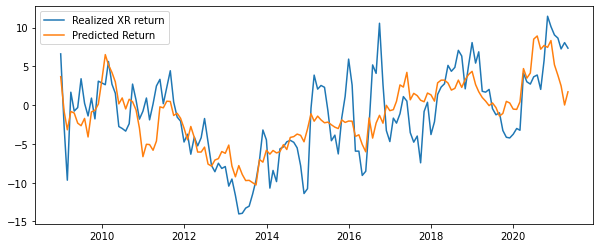

In [73]:
plt.plot(Y, label = 'Realized XR return')
plt.plot(Y.index, results.predict(), label='Predicted Return')
plt.legend()
plt.show()

In [74]:
plt.rcParams['figure.figsize']  = (6, 6)

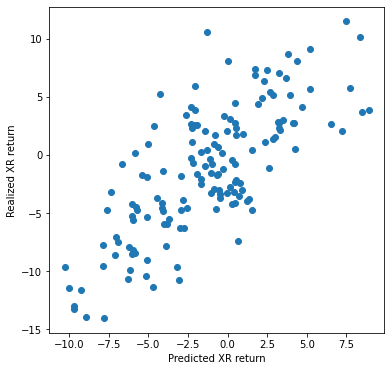

In [75]:
plt.scatter(results.predict(), Y)
plt.xlabel('Predicted XR return')
plt.ylabel('Realized XR return')
plt.show()

## XR Forecast

In [76]:
dataset.tail(3)

,krw_cad_xr,current_account_korea,current_account_canada,gdp_korea,gdp_canada,gdp_growth_korea,gdp_growth_canada,cpi_korea,cpi_canada,int_rate_korea,...,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,gold_growth,oil_growth,ann_ret_exp,ann_ret_exp_growth,ann_ret_imp,ann_ret_imp_growth
2022-02-28,942.96,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.503,...,-2.545167,-0.346,28.192654,3.174745,1908.99,91.64,0.361415,3.415565,0.351933,36.467051
2022-03-31,970.15,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.815,...,-2.165107,-0.586,28.192654,3.505480,1908.99,108.50,0.361415,-6.725660,0.351933,8.842523
2022-04-30,968.06,85133.4,-1038.86,1637895.8,1645423.4,3.7,3.9,121.21,126.04,1.852,...,-1.859647,-0.549,28.192654,2.090744,1908.99,108.50,0.361415,2.756205,0.351933,-2.927843


In [77]:
last_obs = dataset.iloc[-1]

In [78]:
last_xr = last_obs['krw_cad_xr']

In [79]:
last_xr

968.06

In [80]:
# exog = exogeneous variables
exog = last_obs[X_cols]

In [81]:
exog

New Real XR              0.683790
ca_gdp_korea             5.197730
ca_gdp_canada           -0.063136
gdp_growth_korea         3.700000
gdp_growth_canada        3.900000
infl_diff               -1.859647
int_rate_diff           -0.549000
reserves_to_gdp         28.192654
reserves_growth          2.090744
gold_growth           1908.990000
oil_growth             108.500000
ann_ret_exp_growth       2.756205
ann_ret_imp_growth      -2.927843
Name: 2022-04-30 00:00:00, dtype: float64

In [82]:
exog = [1, *exog]

In [83]:
exog

[1,
 0.6837896357754619,
 5.197729916640608,
 -0.06313633317722354,
 3.7000000000000015,
 3.8999999999999995,
 -1.8596468328645255,
 -0.5489999999999997,
 28.192653830603874,
 2.0907435498536353,
 1908.99,
 108.5,
 2.7562048458379174,
 -2.9278429681921625]

In [84]:
pred_ret = results.predict(exog=exog)

In [85]:
pred_xr = last_xr*(1+pred_ret[0]/100)

In [86]:
print('Predicted XR return : {:.2f}%'.format(pred_ret[0]))

Predicted XR return : -10.81%


In [87]:
print('Predicted XR {:.2f} to : {:.2f}'.format(last_xr, pred_xr))

Predicted XR 968.06 to : 863.46


In [88]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [89]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.2f}  ~ {:.2f}'.format( 
        alpha, 
        last_xr*(1+iv_l[0]/100), 
        last_xr*(1+iv_u[0]/100)))

Confidence interval at alpha 0.05 : 764.75  ~ 962.17
Confidence interval at alpha 0.25 : 805.80  ~ 921.12
Confidence interval at alpha 0.50 : 829.71  ~ 897.22


In [92]:
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model

In [93]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

ValueError: operands could not be broadcast together with shapes (149,) (149,14) 